In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, recall_score
from sklearn.preprocessing import LabelEncoder

In [93]:
df = pd.read_csv('/content/Heart_Disease_Prediction.csv')

In [94]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [95]:
df.shape

(270, 14)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [97]:
df['Heart Disease'].value_counts()

,count
Heart Disease,
Absence,150
Presence,120


In [98]:
x = df.drop('Heart Disease', axis=1)
y = df['Heart Disease'].map({'Absence' : 0 , 'Presence' : 1})

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, stratify=y, random_state=42)

In [100]:
x_train.shape

(216, 13)

In [101]:
y_train.shape

(216,)

In [102]:
dtree = DecisionTreeClassifier()

In [103]:
param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [104]:
gird_search = GridSearchCV(
    estimator=dtree,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

In [105]:
gird_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [106]:
gird_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 5}

In [107]:
gird_search.best_score_

np.float64(0.7868921775898521)

In [108]:
best_model = gird_search.best_estimator_

In [109]:
y_pred = best_model.predict(x_test)

In [110]:
acc = accuracy_score(y_test, y_pred)

In [111]:
acc

0.8333333333333334

In [112]:
rec = recall_score(y_test, y_pred)

In [113]:
rec

0.9166666666666666

In [114]:
dtree_model = DecisionTreeClassifier()

In [115]:
dtree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [116]:
y_pred = dtree_model.predict(x_test)

In [117]:
rec_dtree_model = recall_score(y_test, y_pred)

In [118]:
rec_dtree_model

0.8333333333333334

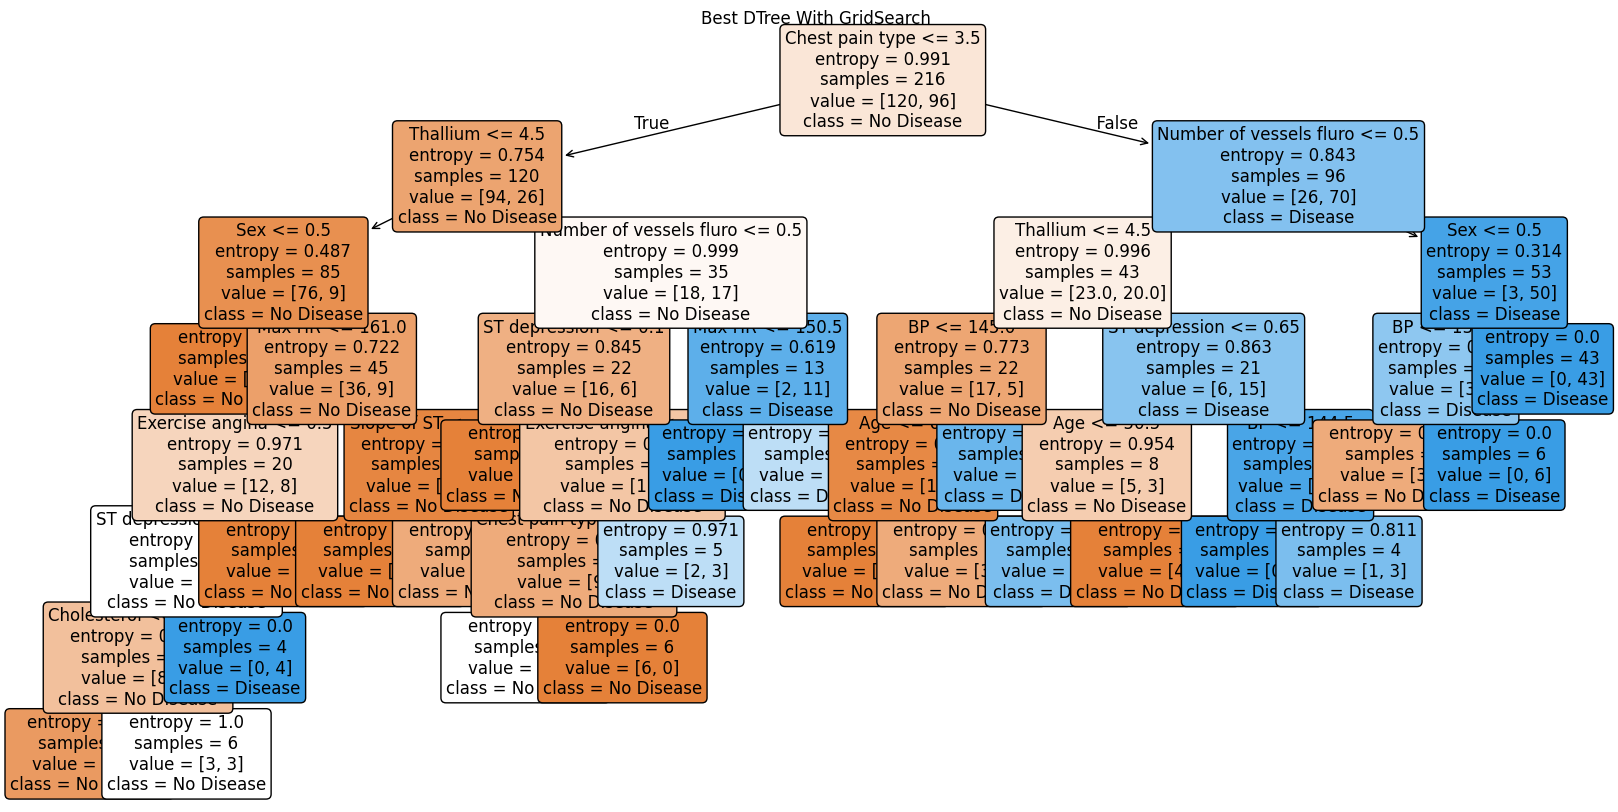

In [119]:
plt.figure(figsize=(20,10))
plot_tree(
    best_model,
    feature_names=x.columns,
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title('Best DTree With GridSearch')
plt.show()

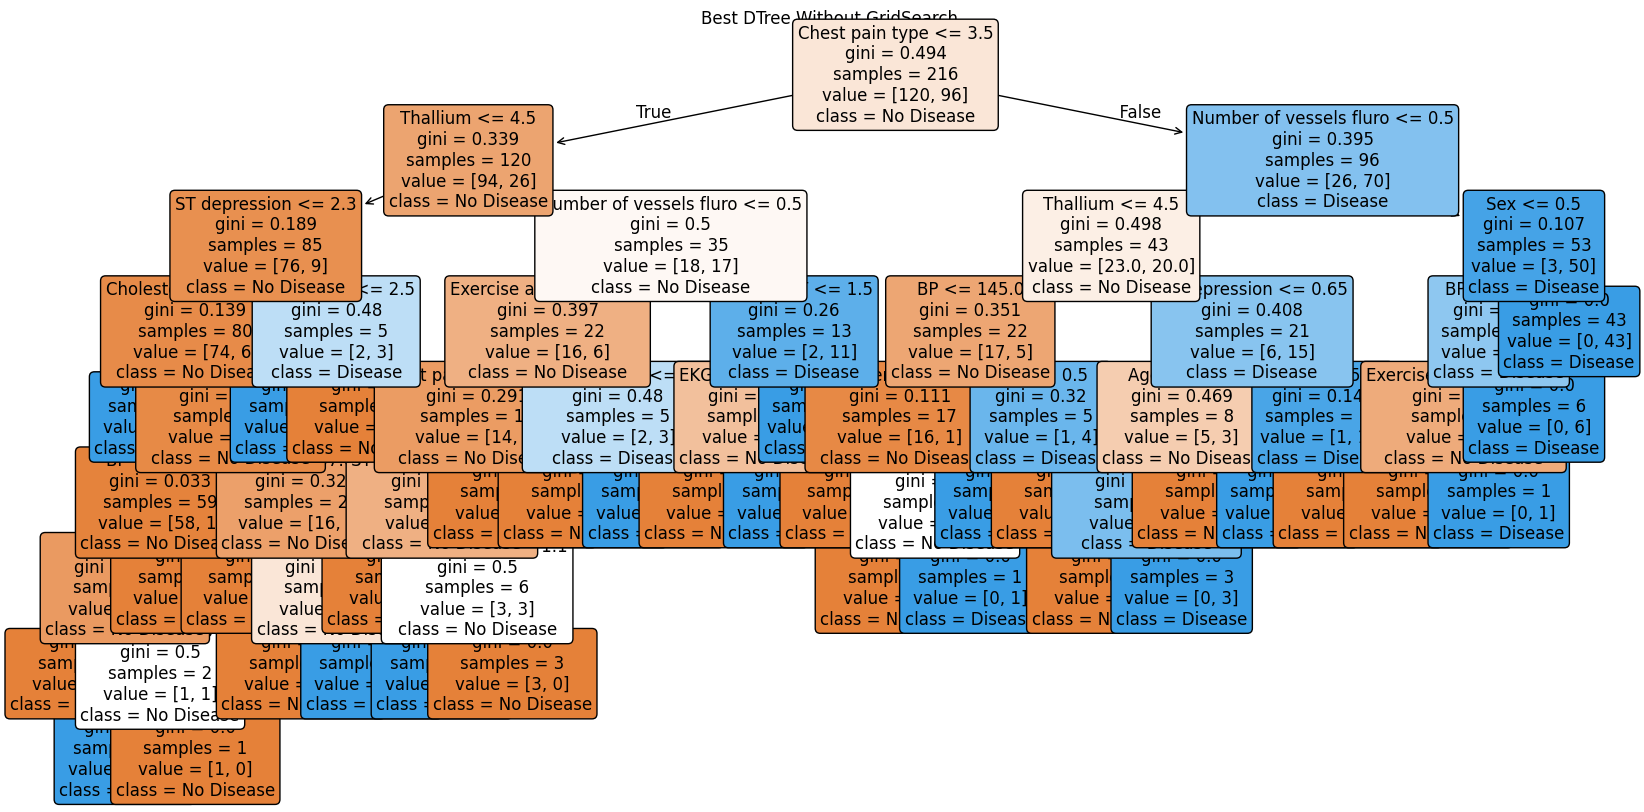

In [120]:
plt.figure(figsize=(20,10))
plot_tree(
    dtree_model,
    feature_names=x.columns,
    class_names=['No Disease', 'Disease'],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title('Best DTree Without GridSearch')
plt.show()

In [121]:
from sklearn.ensemble import RandomForestClassifier

In [122]:
rf_model = RandomForestClassifier(n_estimators=50, max_depth=5)

In [123]:
rf_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50)

In [124]:
y_pred_rf = rf_model.predict(x_test)

In [125]:
rec_rf_model = recall_score(y_test, y_pred_rf)

In [126]:
rec_rf_model

0.8333333333333334

In [127]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth' : [None, 5, 10, 20],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4]
}

In [128]:
from sklearn.model_selection import StratifiedKFold

In [129]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [130]:
rf = RandomForestClassifier()

In [131]:
grid = GridSearchCV(
    estimator=rf,
    param_grid= param_grid,
    scoring='recall',
    n_jobs= -1,
    cv=cv
)

In [132]:
x_train.shape

(216, 13)

In [133]:
y_train.shape

(216,)

In [134]:
grid.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='recall')

In [135]:
best_rd_model = grid.best_estimator_

In [136]:
y_prd = best_rd_model.predict(x_test)

In [137]:
rec_rf = recall_score(y_test, y_prd)

In [138]:
rec_rf

0.8333333333333334